<a href="https://colab.research.google.com/github/Pradip240/IPL-T20-Cricket-Analysis/blob/main/Hrithik__IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
#import packages

import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_dir_path = '/content/drive/MyDrive/Alma Better Cohort Nilgiri/Capstone Project/Exploratory Data Analysis Capstone Project/IPL T20 Cricket Analysis/IPL Data/teamwise_home_and_away.csv'
teamwise_home_and_away_df = pd.read_csv(working_dir_path)

In [4]:
teamwise_home_and_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


In [5]:
teamwise_home_and_away_df.describe()

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


In [6]:
teamwise_home_and_away_df.head(14)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [7]:
team = teamwise_home_and_away_df['team'].loc[0:13]

In [8]:
team

0          Rising Pune Supergiant
1                  Mumbai Indians
2             Chennai Super Kings
3                  Delhi Capitals
4             Sunrisers Hyderabad
5                Rajasthan Royals
6                 Deccan Chargers
7                 Kings XI Punjab
8     Royal Challengers Bangalore
9           Kolkata Knight Riders
10               Delhi Daredevils
11                  Pune Warriors
12           Kochi Tuskers Kerala
13                  Gujarat Lions
Name: team, dtype: object

In [9]:
length_of_team = np.array(len(team))

In [10]:
length_of_team

array(14)

In [11]:
home_wins_of_team = teamwise_home_and_away_df['home_wins']

In [12]:
home_wins_of_team

0      5
1     58
2     51
3      3
4     30
5     29
6     18
7     38
8     35
9     34
10    25
11     6
12     2
13     1
Name: home_wins, dtype: int64

In [13]:
away_wins_of_team = teamwise_home_and_away_df['away_wins']

In [14]:
away_wins_of_team

0      5
1     51
2     49
3      7
4     28
5     46
6     11
7     44
8     49
9     58
10    42
11     6
12     4
13    12
Name: away_wins, dtype: int64

Text(0, 0.5, 'Wins at Home & Away')

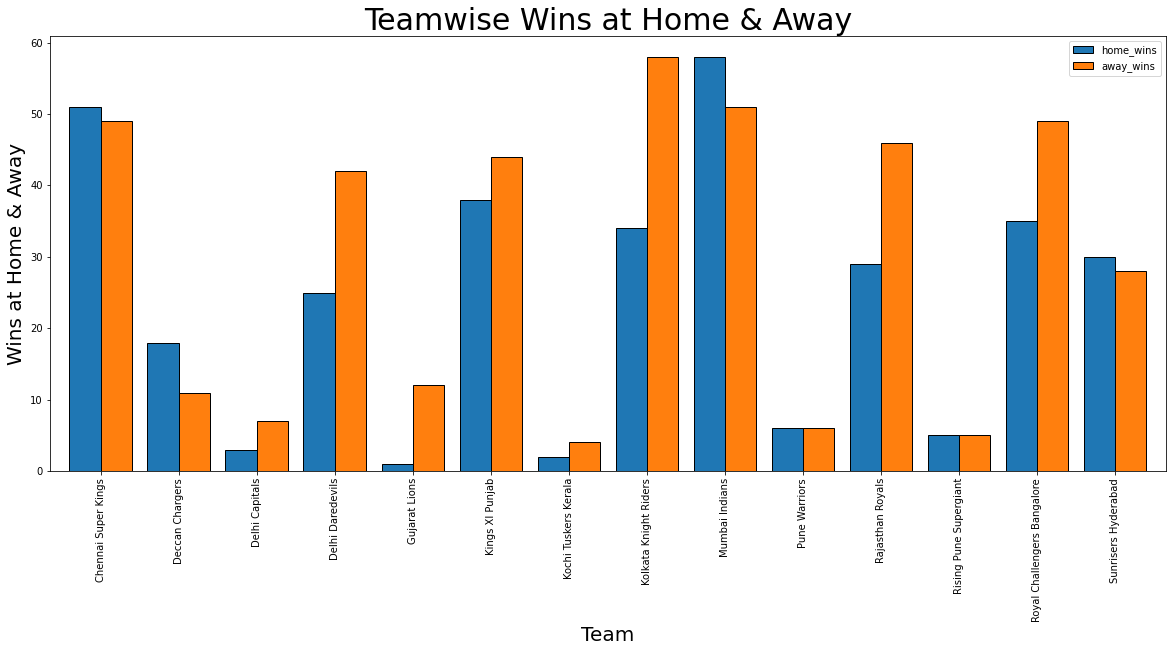

In [16]:
# Create the figure object 
qw = teamwise_home_and_away_df.groupby(['team'])[['home_wins','away_wins']].mean().plot.bar(
    width=0.8,
    linewidth= 1,
    edgecolor='black',
    figsize = (20,8),
    fontsize = 10,
)

qw.set_title("Teamwise Wins at Home & Away", fontsize = 30)

# Set x-labels
qw.set_xlabel("Team", fontsize = 20)
qw.set_ylabel("Wins at Home & Away", fontsize = 20)